# Mandelbrot set
This notebook generates the results used in the report for the first assignment of the course 'Stochastic Simulation'.

**Authors**:

1. Divya
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: 
- Student Number: 

2. K. López
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: kenia.lopez.sotomayor@student.uva.nl
- Student Number: 12965081

## Section 1: Implementation


In [2]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
import random

#from pyDOE import lhs


from scipy.stats import norm
from scipy import stats


The Mandelbrot set is the set of those complex numbers c for which the function z = z * z + c does not go to infinite. 
A high number of iterations indicates slower divergence and a point that stays within bounds. 
This means that for these points, the iterative function z takes more iterations before determining that the point diverges and moves away from the set.

https://github.com/KeniaLS/Stoc_Sim_Assignment1.gitgit 

Approximated area of the Mandelbrot set: 1.514376
The number total number of points within the set: 42066


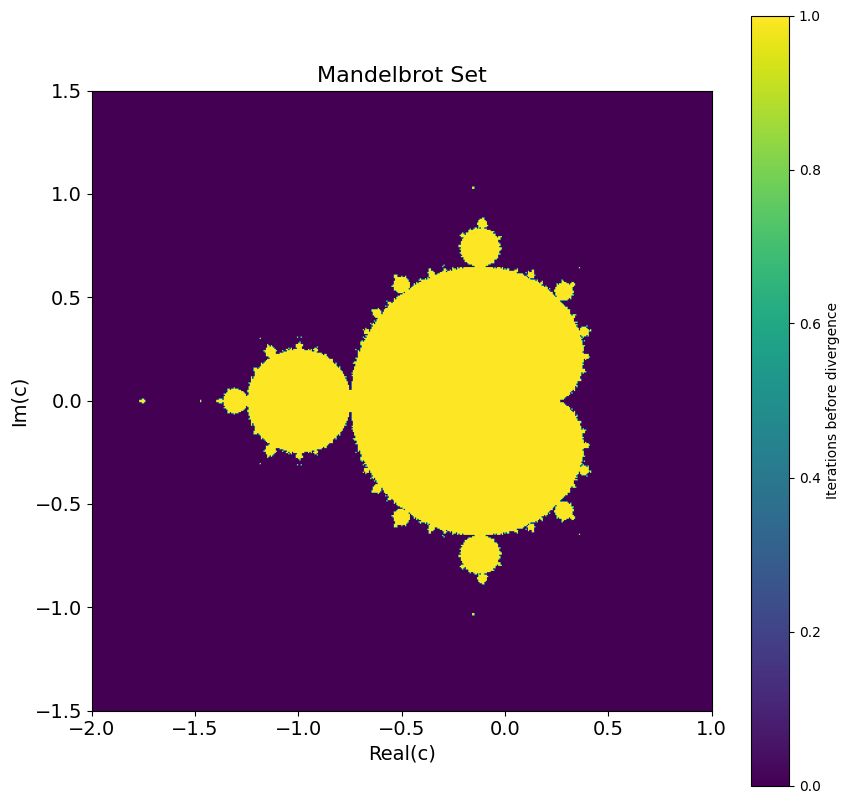

In [3]:
def mandelbrot(c, max_iter):
    '''Function that asseses if the complex number diverges after some number iterations.
    Expects: c and max_iter, a complex number and the maximum number of iterations to check for divergence.
    Modifies: nothing
    Returns: Number boolean True if the complex number does not diverege afeter a max_iter'''
    z = 0
    for n in range(max_iter):
        z = z * z + c
        if abs(z) > 2:  # Check for divergence. If the magnitude of c is greater than 2, abs(z) > 2, then the sequence will diverge to infinity.
            return False  # Point c not in Mandelbrot set
        
    return True  # Point c in Mandelbrot set


def mandelbrot_plot():
    max_iter = 255
    x_min, x_max = -2.0, 1.0
    y_min, y_max = -1.5, 1.5
    width, height = 500, 500 #Resolution of the image


    total_points = width * height
    points_inside_set = 0

    mandelbrot_image = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            real = x * (x_max - x_min) / (width - 1) + x_min
            imag = y * (y_max - y_min) / (height - 1) + y_min
            c = complex(real, imag)

            mandelbrot_image[x, y] = mandelbrot(c, max_iter)

            if mandelbrot(c, max_iter) == True:
                points_inside_set += 1

    area_ratio = points_inside_set / total_points
    total_area = (x_max - x_min) * (y_max - y_min)
    estimated_area = area_ratio * total_area
    A_M = estimated_area


    print (f"Approximated area of the Mandelbrot set: {A_M}")
    print (f"The number total number of points within the set: {points_inside_set}")


    plt.figure(figsize=(10, 10))
    plt.imshow(mandelbrot_image.T, cmap='viridis', extent=(x_min, x_max, y_min, y_max))
    plt.xlabel('Real(c)', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Im(c)', fontsize=14)
    plt.title('Mandelbrot Set', fontsize=16)
    plt.colorbar(label='Iterations before divergence')
    plt.show()

    #estimated_area, points_inside = mandelbrot_area(1000)
    #print("Estimated Area:", estimated_area)
    #print("Points Inside Mandelbrot Set:", points_inside)

mandelbrot_plot()


Approximated area of the Mandelbrot set: 1.514376
The number total number of points within the set: 42066


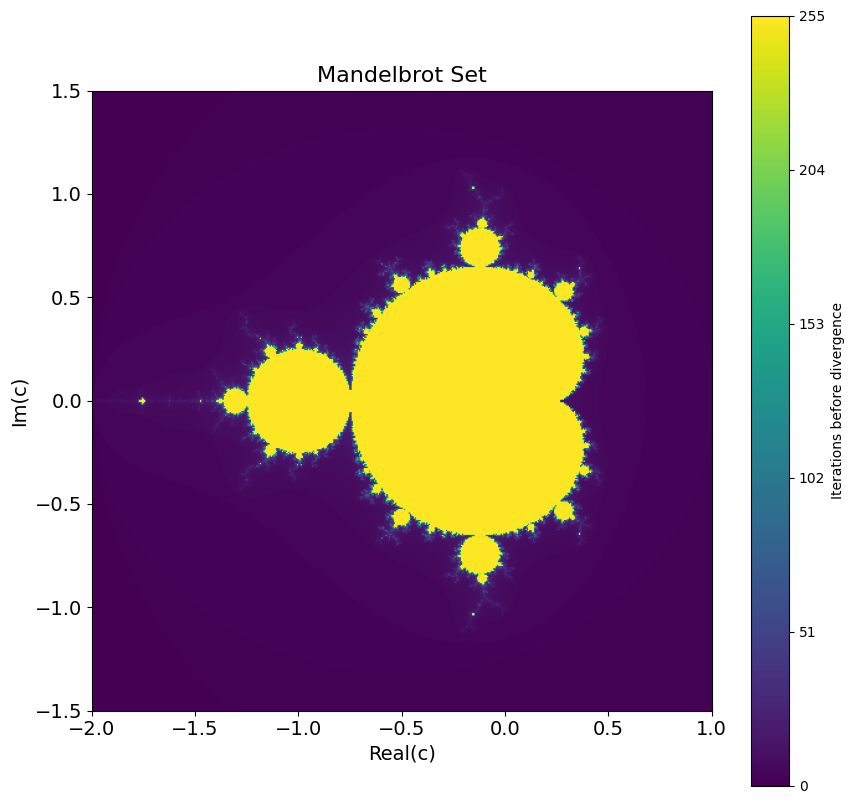

In [4]:
def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        z = z * z + c
        if abs(z) > 2:
            return False, n  # Point is not in the Mandelbrot set, return boolean and iterations
    return True, max_iter  # Point is in the Mandelbrot set, return boolean and max_iter

def mandelbrot_plot():
    max_iter = 255
    x_min, x_max = -2.0, 1.0
    y_min, y_max = -1.5, 1.5
    width, height = 500, 500

    total_points = width * height
    points_inside_set = 0

    mandelbrot_image = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            real = x * (x_max - x_min) / (width - 1) + x_min
            imag = y * (y_max - y_min) / (height - 1) + y_min
            c = complex(real, imag)

            in_mandelbrot, iterations = mandelbrot(c, max_iter)
            mandelbrot_image[x, y] = iterations

            if in_mandelbrot:
                points_inside_set += 1

    area_ratio = points_inside_set / total_points
    total_area = (x_max - x_min) * (y_max - y_min)
    estimated_area = area_ratio * total_area
    AREA = estimated_area

    print(f"Approximated area of the Mandelbrot set: {AREA}")
    print(f"The number total number of points within the set: {points_inside_set}")

    plt.figure(figsize=(10, 10))
    img = plt.imshow(mandelbrot_image.T, cmap='viridis', extent=(x_min, x_max, y_min, y_max))
    plt.xlabel('Real(c)', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('Im(c)', fontsize=14)
    plt.title('Mandelbrot Set', fontsize=16)
    colorbar = plt.colorbar(img, label='Iterations before divergence')
    colorbar.set_ticks(np.arange(0, max_iter+1, max_iter//5))  # Adjust the tick positions
    plt.show()

mandelbrot_plot()


# MonteCarlo Integration

## Convergence as Number of Iterations Increases

In [13]:
area_square = 3*3       ## area of the square in which we are taking a samples

In [14]:
num_iters= range(1, 1000, 2)     ## range of values for changing the No. of iterations
samples  = 50                  ## sample size
              
based_iter    = []
for iters in num_iters:
    num_points_mandel = 0
    x_point = uniform.rvs(-2, 3, size=samples)
    y_point = uniform.rvs(-1.5, 3, size=samples)
    for x,y in zip(x_point, y_point):
        c = complex(x, y)
        in_mandelbrot, _ = mandelbrot(c, iters)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
    area = num_points_mandel * area_square/samples
    based_iter.append(area)  
  

Text(0, 0.5, 'Estimated Area of Mandelbrot')

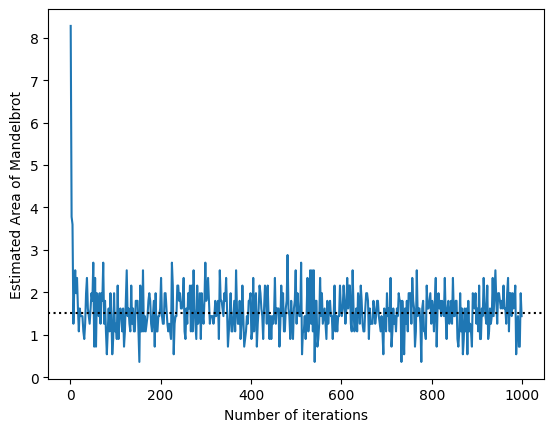

In [26]:
plt.plot(num_iters, based_iter)
plt.axhline(y = 1.52, color = 'k', linestyle = ':') 
plt.xlabel("Number of iterations")
plt.ylabel("Estimated Area of Mandelbrot")

## Convergence as Number of Samples Increases

In [28]:
num_samples = range(10, 3000, 10)     ## range of values for changing the Sample size
num_iters = 400                       ## Number of iterations 
based_sample = []
for samples in num_samples:
    num_points_mandel = 0
    x_point = uniform.rvs(-2, 3, size=samples)
    y_point = uniform.rvs(-1.5, 3, size=samples)
    for x,y in zip(x_point, y_point):
        c = complex(x, y)
        in_mandelbrot, _ = mandelbrot(c, num_iters)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
    area = num_points_mandel * area_square/samples
    based_sample.append(area) 

Text(0, 0.5, 'Estimated Area of Mandelbrot')

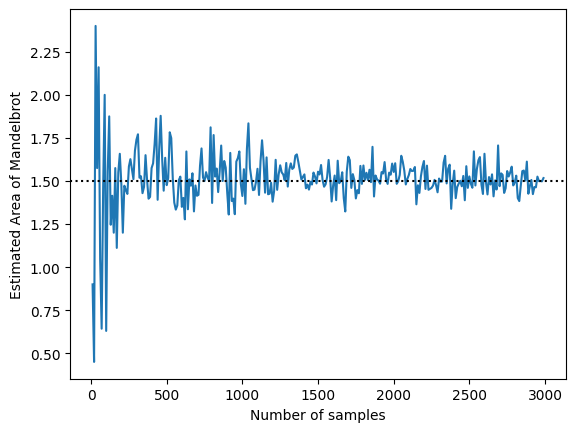

In [29]:
plt.plot(num_samples, based_sample)
plt.axhline(y = 1.5, color = 'k', linestyle = ':') 
plt.xlabel("Number of samples")
plt.ylabel("Estimated Area of Mandelbrot")

# Error Calculation

In [28]:
max_iterations = 200
max_samples = 2000
area_i = []
for i in range(100):
    num_points_mandel = 0
    x_point = uniform.rvs(-2, 3, size=max_samples)
    y_point = uniform.rvs(-1.5, 3, size=max_samples)
    for x,y in zip(x_point, y_point):
        c = complex(x, y)
        in_mandelbrot, _ = mandelbrot(c, max_iterations)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
    area_temp = num_points_mandel * area_square/max_samples 
    area_i.append(area_temp)



In [30]:
mean_area_i = np.mean(np.array(area_i))
sd_area_i = np.std(np.array(area_i))
var_area_i = np.sqrt(sd_area_i)
print("Mean Area of Mandelbrot for Iterations = 200 and Samples = 2000:", mean_area_i)
print("Standard deviation of Mandelbrot for Iterations = 200 and Samples = 2000:", sd_area_i)
print(var_area_i)

Mean Area of Mandelbrot for Iterations = 200 and Samples = 2000: 1.5049350000000001
Standard deviation of Mandelbrot for Iterations = 200 and Samples = 2000: 0.07909575383672628
0.28123967329792976


## Number of iteration changes

In [32]:
num_iters= range(1, max_iterations, 2)     ## range of values for changing the No. of iterations
iter_eval    = []
for iters in num_iters:
    num_points_mandel = 0
    for x,y in zip(x_point, y_point):
        c = complex(x, y)
        in_mandelbrot, _ = mandelbrot(c, iters)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
    area = num_points_mandel * area_square/max_samples
    iter_eval.append(area - mean_area_i)   

Text(0.5, 0, 'Number of Iterations')

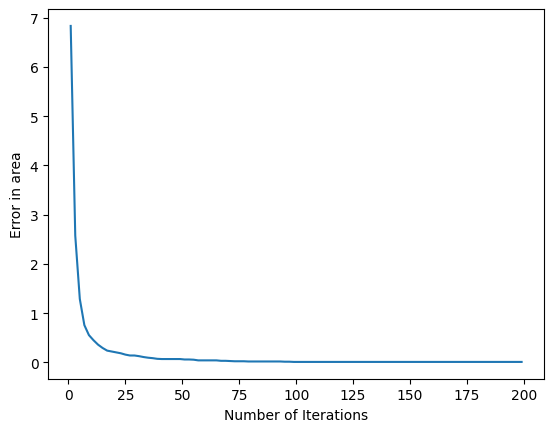

In [33]:
plt.plot(num_iters, iter_eval)
plt.ylabel("Error in area")
plt.xlabel("Number of Iterations")

## Number of samples changes

In [34]:
num_samples = range(1, max_samples, 2)     ## range of values for changing the No. of iterations
sample_eval = []
for samples in num_samples:
    #temp_sample = []
    x_point = uniform.rvs(-2, 3, size=samples)
    y_point = uniform.rvs(-1.5, 3, size=samples)
    num_points_mandel = 0
    for x,y in zip(x_point, y_point):
        c = complex(x, y)
        in_mandelbrot, _ = mandelbrot(c, max_iterations)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
    area = num_points_mandel * area_square/samples
    #temp_sample.append(area)
    sample_eval.append(area - mean_area_i)


Text(0.5, 0, 'Number of Samples')

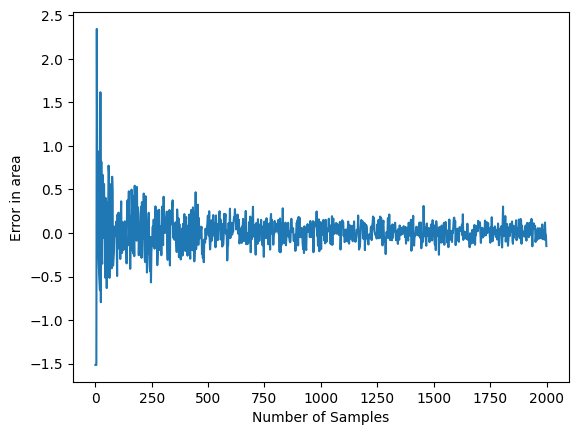

In [35]:
plt.plot(num_samples, np.array(sample_eval))
plt.ylabel("Error in area")
plt.xlabel("Number of Samples")

## Latin Hypercube Sampling

[[-1.96973119  0.52285846]
 [-1.63038241 -1.07395301]
 [-1.59995142  1.21071614]
 [-1.37968728  1.02910575]
 [-1.04685696 -0.14614718]
 [-0.92483881  0.48164429]
 [-0.66041639 -0.01383569]
 [-0.48837029 -0.74069501]
 [-0.39297644 -1.30790871]
 [-0.19920533  1.34344963]
 [ 0.15476384  0.89497359]
 [ 0.25317326 -0.32027141]
 [ 0.48721137 -1.17203891]
 [ 0.68240936  0.18978639]
 [ 0.89092841 -0.5242257 ]]


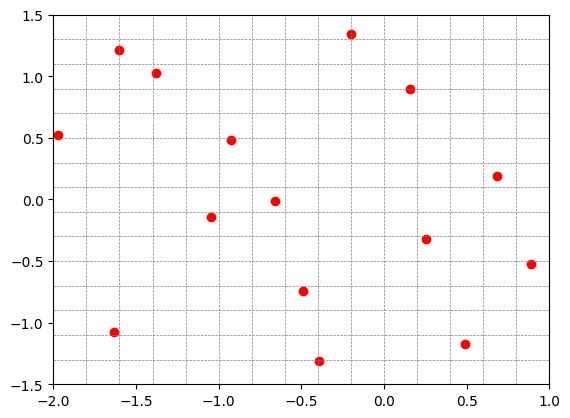

In [106]:

def latin_hypercube_sampling_and_grid(n, x_range, y_range):
    '''Function that performs Latin hypercube sampling and plots the grid.
    Expects: the number of samples n and the range of the x and y values.
    Modifies: nothing
    Returns: the samples in the grid'''
    x_min, x_max = x_range
    y_min, y_max = y_range
    
    # Generate Latin hypercube samples
    x_points = np.linspace(x_min, x_max, n, endpoint=False) + np.random.uniform(0, (x_max - x_min) / n, n)
    y_points = np.linspace(y_min, y_max, n, endpoint=False) + np.random.uniform(0, (y_max - y_min) / n, n)
    
    # Shuffle the y_points
    np.random.shuffle(y_points)
    
    # Combine x and y points
    points = np.column_stack((x_points, y_points))

    
    plt.figure
    plt.xlim([x_min,x_max])
    plt.ylim([y_min,y_max])
    plt.scatter(points[:,0],points[:,1],c='r')

    dx = abs(x_max - x_min)/n
    dy = abs(y_max - y_min)/n
    
    for i in np.arange(x_min, x_max, dx):
        plt.axvline(i, color='gray', linestyle='--', linewidth=0.5)
    for j in np.arange(y_min, y_max, dy):
        plt.axhline(j, color='gray', linestyle='--', linewidth=0.5)

    plt.show()

# Given dimensions and number of samples
x_range = [-2, 1]
y_range = [-1.5, 1.5]
num_samples = 15

# Perform Latin hypercube sampling
samples = latin_hypercube_sampling_and_grid(num_samples, x_range, y_range)






In [38]:

def latin_hypercube_sampling(num_samples):
    '''Function that performs Latin hypercube sampling.
       Expects: number of samples
       Modifies: nothing
       Returns: x and y points. A point that will be or not in the Mandelbrot set'''

    x_range = [-2, 1]
    y_range = [-1.5, 1.5]
    x_min, x_max = x_range
    y_min, y_max = y_range
    
    # Generate Latin hypercube samples
    x_points = np.linspace(x_min, x_max, num_samples, endpoint=False) + np.random.uniform(0, (x_max - x_min) / num_samples, num_samples)
    y_points = np.linspace(y_min, y_max, num_samples, endpoint=False) + np.random.uniform(0, (y_max - y_min) / num_samples, num_samples)
    
    # Shuffle the y_points
    np.random.shuffle(y_points)
    
    # Combine x and y points
    points = np.column_stack((x_points, y_points))
    
    return points

# Perform Latin hypercube sampling
latin_hypercube_sampling(10)



array([[-1.76462367,  1.46509136],
       [-1.55092403, -0.60091713],
       [-1.1134142 , -1.00521939],
       [-0.87898927,  0.65429652],
       [-0.55897246,  0.59683987],
       [-0.4643474 , -0.15415901],
       [ 0.01741907, -1.43841978],
       [ 0.27860453,  1.03243617],
       [ 0.47570555, -0.34266447],
       [ 0.71801411,  0.16722553]])

## Convergence as the number of iterations increases - LHS

In [111]:
num_iters_LHS= range(1, 1000, 2)     ## range of values for changing the No. of iterations
samples_LHS  = 50                  ## sample size
               ## area of the square in which we are taking a samples
based_iter_LHS    = []
for iters in num_iters_LHS:
    num_points_mandel = 0
    points = latin_hypercube_sampling(samples_LHS)
    #x = points[:,0]
    #y = points[:,1]
    for x,y in points:
        c = complex(x, y)
        in_mandelbrot, _ = mandelbrot(c, iters)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
    area = num_points_mandel * area_square/samples_LHS
    based_iter_LHS.append(area)  


Text(0, 0.5, 'Estimated Area of Mandelbrot with LHS')

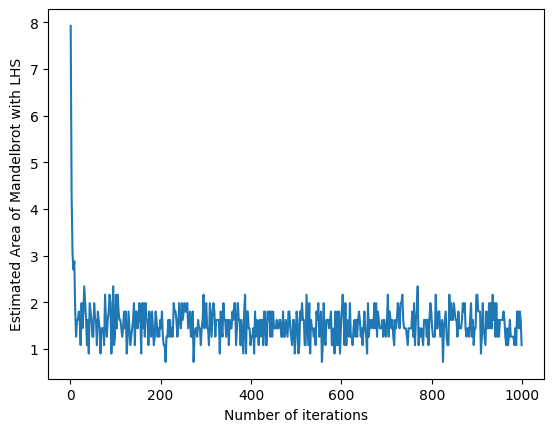

In [112]:
plt.plot(num_iters_LHS, based_iter_LHS)
#plt.axhline(y = 1.52, color = 'k', linestyle = ':') 
plt.xlabel("Number of iterations")
plt.ylabel("Estimated Area of Mandelbrot with LHS")


## Convergence as the Number of Samples Increases - LHS

In [76]:
num_samples_LHS = range(10, 3000, 10)     ## range of values for changing the Sample size
num_iters_LHS = 400                       ## Number of iterations 
based_sample_LHS    = []
for samples in num_samples_LHS:
    num_points_mandel = 0
    points = latin_hypercube_sampling(samples)
    for x,y in points:
        c = complex(x, y)
        in_mandelbrot, _ = mandelbrot(c, num_iters_LHS)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
    area = num_points_mandel * area_square/samples
    based_sample_LHS.append(area) 



Text(0, 0.5, 'Estimated Area of Mandelbrot with LHS')

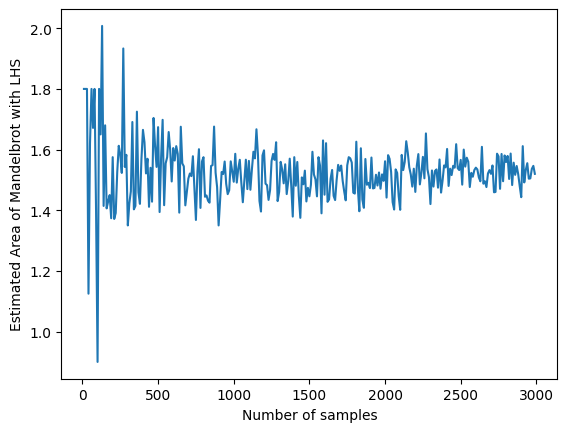

In [77]:
plt.plot(num_samples_LHS, based_sample_LHS)
#plt.axhline(y = 1.5, color = 'k', linestyle = ':') 
plt.xlabel("Number of samples")
plt.ylabel("Estimated Area of Mandelbrot with LHS")

## Orthogonal Sampling

In [23]:

def orthogonal_sampling(MAJOR):
    xlist = np.zeros((MAJOR, MAJOR), dtype=int)
    ylist = np.zeros((MAJOR, MAJOR), dtype=int)
    SAMPLES = MAJOR * MAJOR
    RUNS = 10
    scale = 4.0 / SAMPLES

    np.random.seed(3737)
    m = 0
    xl_p = []
    yl_p = []

    for i in range(MAJOR):
        for j in range(MAJOR):
            xlist[i][j] = ylist[i][j] = m
            m += 1

    for _ in range(RUNS):
        
        for i in range(MAJOR):
            random.shuffle(xlist[i])
            random.shuffle(ylist[i])

        for i in range(MAJOR):             # Subsquare column
            for j in range(MAJOR):         # Subsquare row
                x = -2.0 + scale * (xlist[i][j] + random())
                y = -2.0 + scale * (ylist[j][i] + random())
            
                xl_p.append(x)
                yl_p.append(y)
                
    return xl_p, yl_p


In [1]:
def iter_vs_area(x_point, y_point, max_iterations, max_samples):
    num_iters= range(1, max_iterations, 2)     ## range of values for changing the No. of iterations
    iter_eval    = []
    for iters in num_iters:
        num_points_mandel = 0
        for x,y in zip(x_point, y_point):
            c = complex(x, y)
            in_mandelbrot, _ = mandelbrot(c, iters)  # The second element in the tuple is the number of iterations, which we don't need here
            if in_mandelbrot:
                num_points_mandel += 1
        area = num_points_mandel * 9 /max_samples
        iter_eval.append(area) 
    return iter_eval, num_iters

In [ ]:
points = orthogonal_sampling(20)
ortho_iter, iterations = iter_vs_area(points[0], points[1], 400, 400)
plt.plot(iterations, ortho_iter)
plt.ylabel("Area")
plt.xlabel("Number of Iterations")

In [ ]:
def samples_vs_area(num_iters):
    grid = range(10, 500, 10)     ## range of values for changing the Sample size
    num_iters = 200                       ## Number of iterations 
    based_samples = []
    for g_p in grid:
        num_points_mandel = 0
        points = orthogonal_sampling(g_p)
        for x,y in zip(points[0], points[1]):
            c = complex(x, y)
            in_mandelbrot, _ = mandelbrot(c, num_iters)  # The second element in the tuple is the number of iterations, which we don't need here
            if in_mandelbrot == True:
                num_points_mandel += 1
        area = num_points_mandel * 9 /g_p**2
        based_samples.append(area) 
    return based_samples, grid

In [ ]:
ortho_iter, no_grid = samples_vs_area(200)
no_samples = [x**2 for x in no_grid]
plt.plot(no_samples, ortho_iter)
plt.ylabel("Area")
plt.xlabel("Number of Samples")

# Confidence interval 

In [ ]:
num_samples = range(500, 20000, 500)     ## range of values for changing the No. of iterations
mean_ev = []
ci_ev = []
for samples in num_samples:
    temp_eval = []
    for _ in range(50):
        x_point = uniform.rvs(-2, 3, size=samples)
        y_point = uniform.rvs(-1.5, 3, size=samples)
        num_points_mandel = 0
        for x,y in zip(x_point, y_point):
            c = complex(x, y)
            in_mandelbrot, _ = mandelbrot(c, 200)  # The second element in the tuple is the number of iterations, which we don't need here
            if in_mandelbrot == True:
                num_points_mandel += 1
        area = num_points_mandel * 9/samples
        temp_eval.append(area)
    sd_sample = np.std(np.array(temp_eval))
    ci_sample = 1.96 * sd_sample / np.sqrt(50)
    mean_sample = np.mean(np.array(temp_eval))
    ci_ev.append(ci_sample)
    mean_ev.append(mean_sample)

In [ ]:
plt.scatter(num_samples, mean_ev, label='Mean Areas', color='blue')
plt.errorbar(num_samples, mean_ev, yerr=ci_ev, fmt='*', color='red', capsize=2, label='Confidence interval')
plt.xlabel('num_samples')
plt.ylabel('Mean Area')
plt.legend()

## Error Calculation as Number of iteration changes

In [62]:
max_iterations_LHS = 50
max_samples_LHS = 750
area_i_LHS = []
for i in range(100):
    num_points_mandel = 0
    points = latin_hypercube_sampling(max_samples_LHS)
    for x,y in points:
        c = complex(x, y)
        in_mandelbrot, _ = mandelbrot(c, max_iterations_LHS)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
    area_temp = num_points_mandel * area_square/max_samples_LHS 
    area_i_LHS.append(area_temp)



100


In [75]:
mean_area_i_LHS = np.mean(np.array(area_i_LHS))
sd_area_i_LHS = np.std(np.array(area_i_LHS))
print("Mean Area of Mandelbrot for Iterations = 50 and Samples = 750:", mean_area_i_LHS)


Mean Area of Mandelbrot for Iterations = 50 and Samples = 750: 1.57464


## Number of iteration changes

In [45]:
num_iters_LHS= range(1, max_iterations_LHS, 2)     ## range of values for changing the No. of iterations
iter_eval_LHS    = []
for iters in num_iters_LHS:
    num_points_mandel = 0
    for x,y in points:
        c = complex(x, y)
        in_mandelbrot, _ = mandelbrot(c, iters)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
    area = num_points_mandel * area_square/max_samples_LHS
    iter_eval_LHS.append(area - mean_area_i_LHS) 

Text(0.5, 0, 'Number of Iterations')

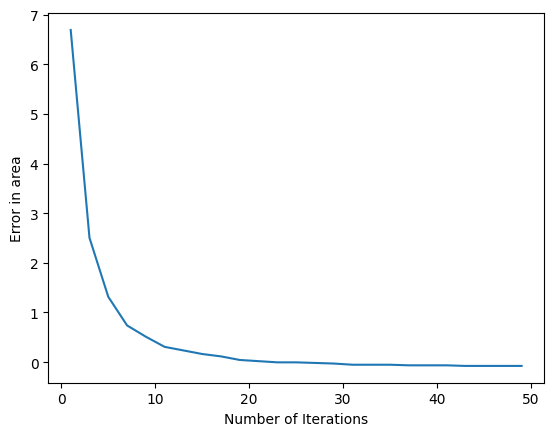

In [46]:
plt.plot(num_iters_LHS, iter_eval_LHS)
plt.ylabel("Error in area")
plt.xlabel("Number of Iterations")

# Number of sample changes

In [53]:
num_samples_LHS = range(1, max_samples_LHS, 2)   
sample_eval_LHS = []
for samples in num_samples_LHS:
    #temp_sample = []
    points = latin_hypercube_sampling(samples)
    num_points_mandel = 0
    for x,y in points:
        c = complex(x, y)
        in_mandelbrot, _ = mandelbrot(c, max_iterations_LHS)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
    area = num_points_mandel * area_square/samples
    #temp_sample.append(area)
    sample_eval_LHS.append(area - mean_area_i_LHS)


Text(0.5, 0, 'Number of Samples')

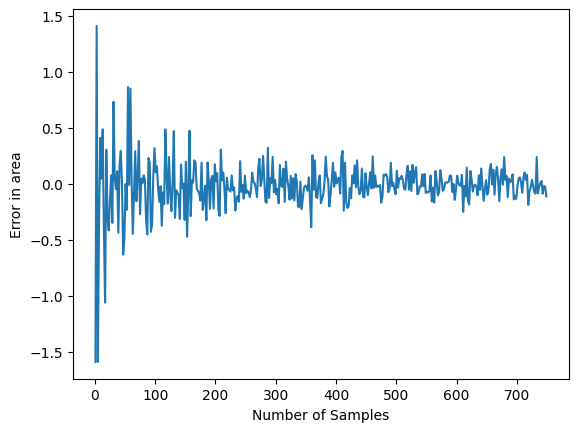

In [54]:
plt.plot(num_samples_LHS, np.array(sample_eval_LHS))
plt.ylabel("Error in area")
plt.xlabel("Number of Samples")

## Antithetic Variates 

In [9]:
num_iters= range(1, 1000, 2)     ## range of values for changing the No. of iterations
samples  = 50                  ## sample size
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
area_square = 3*3 
              
based_iter_anti    = []
based_iter_U = []
based_iter_Ui = []

for iters in num_iters:
    num_points_mandel = 0
    num_points_mandel_U = 0
    num_points_mandel_Ui = 0
    count = 0

    while count < samples:
        x_point = uniform.rvs(-2, 3, size=1)
        y_point = uniform.rvs(-1.5, 3, size=1)
        c = complex(x_point, y_point)
        in_mandelbrot, _ = mandelbrot(c, iters)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
            num_points_mandel_U += 1

        anti_x_point = (x_min+x_max) - x_point
        anti_y_point = (y_min+y_max) - y_point
        anti_c = complex(anti_x_point, anti_y_point)

        in_mandelbrot_anti, _ = mandelbrot(anti_c, iters)
        if in_mandelbrot_anti == True:
            num_points_mandel += 1
            num_points_mandel_Ui += 1
        
        count += 2


    area = num_points_mandel * area_square/samples
    area_U = num_points_mandel_U * area_square/(samples/2)
    area_Ui = num_points_mandel_Ui * area_square/(samples/2)
    based_iter_anti.append(area)  
    based_iter_Ui.append(area_Ui)
    based_iter_U.append(area_U)

    

0.4430891811500497
0.324792144288577
0.6054852532943382


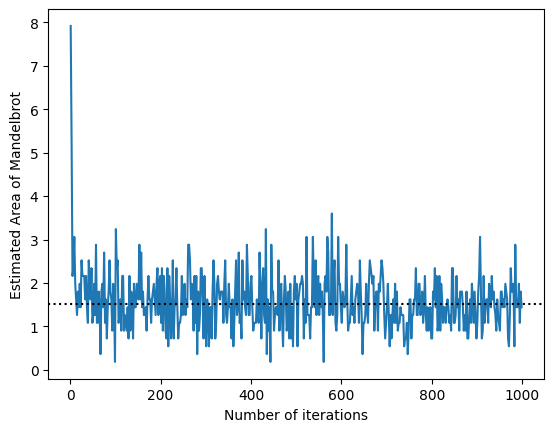

In [14]:
plt.plot(num_iters, based_iter_anti)
plt.axhline(y = 1.52, color = 'k', linestyle = ':') 
plt.xlabel("Number of iterations")
plt.ylabel("Estimated Area of Mandelbrot")
sd_area_U = np.std(np.array(based_iter_U))
var_area_error = 0.5 * np.sqrt(sd_area_U)
cov_area = np.cov(based_iter_U, based_iter_Ui)[0, 1]
print(var_area_error)
print(cov_area)
var_area_cov = 0.5 * np.sqrt(sd_area_U) + 0.5 * cov_area
print(var_area_cov)

Antithetic sample variet

In [10]:
num_samples = range(10, 3000, 10)     ## range of values for changing the Sample size
num_iters = 400                       ## Number of iterations 
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
area_square = 3*3 
              
based_sample_anti = []
based_sample_U = []
based_sample_Ui = []

for samples in num_samples:
    num_points_mandel = 0
    num_points_mandel_U = 0
    num_points_mandel_Ui = 0
    count = 0

    while count < samples:
        x_point = uniform.rvs(-2, 3, size=1)
        y_point = uniform.rvs(-1.5, 3, size=1)
        c = complex(x_point, y_point)
        in_mandelbrot, _ = mandelbrot(c, num_iters)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
            num_points_mandel_U += 1

        anti_x_point = (x_min+x_max) - x_point
        anti_y_point = (y_min+y_max) - y_point
        anti_c = complex(anti_x_point, anti_y_point)

        in_mandelbrot_anti, _ = mandelbrot(anti_c, num_iters)
        if in_mandelbrot_anti == True:
            num_points_mandel += 1
            num_points_mandel_U += 1
        
        count += 2


    area = num_points_mandel * area_square/samples
    area_U = num_points_mandel_U * area_square/(samples/2)
    area_Ui = num_points_mandel_Ui * area_square/(samples/2)
    based_sample_anti.append(area)  
    based_sample_Ui.append(area_Ui)
    based_sample_U.append(area_U)

0.2749038165477815
0.0
0.2749038165477815


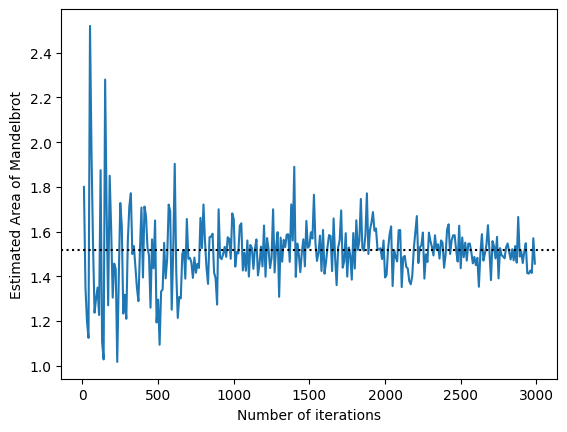

In [11]:
plt.plot(num_samples, based_sample_anti)
plt.axhline(y = 1.52, color = 'k', linestyle = ':') 
plt.xlabel("Number of iterations")
plt.ylabel("Estimated Area of Mandelbrot")
sd_area_U = np.std(np.array(based_sample_U))
var_area_error = 0.5 * np.sqrt(sd_area_U)
cov_area = np.cov(based_sample_U, based_sample_Ui)[0, 1]
print(var_area_error)
print(cov_area)
var_area_cov = 0.5 * np.sqrt(sd_area_U) + 0.5 * cov_area
print(var_area_cov)

In [6]:
max_iterations = 100
max_samples = 1600
based_error_anti = []
based_error_Ui = []
based_error_U = []
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
area_square = 3*3

for i in range(100):
    num_points_mandel = 0
    num_points_mandel_U = 0
    num_points_mandel_Ui = 0
    count = 0

    while count < max_samples:
        x_point = uniform.rvs(-2, 3, size=1)
        y_point = uniform.rvs(-1.5, 3, size=1)
        c = complex(x_point, y_point)
        in_mandelbrot, _ = mandelbrot(c, max_iterations)  # The second element in the tuple is the number of iterations, which we don't need here
        if in_mandelbrot == True:
            num_points_mandel += 1
            num_points_mandel_U += 1

        anti_x_point = (x_min+x_max) - x_point
        anti_y_point = (y_min+y_max) - y_point
        anti_c = complex(anti_x_point, anti_y_point)

        in_mandelbrot_anti, _ = mandelbrot(anti_c, max_iterations)
        if in_mandelbrot_anti == True:
            num_points_mandel += 1
            num_points_mandel_Ui += 1
        
        count += 2

    area = num_points_mandel * area_square/max_samples
    area_U = num_points_mandel_U * area_square/(max_samples/2)
    area_Ui = num_points_mandel_Ui * area_square/(max_samples/2)
    based_error_anti.append(area)  
    based_error_Ui.append(area_Ui)
    based_error_U.append(area_U)

In [8]:
mean_area_error = np.mean(np.array(based_error_anti))
sd_area_error = np.std(np.array(based_error_U))
var_area_error = 0.5 * np.sqrt(sd_area_error)
print("Mean Area of Mandelbrot for Iterations = 100 and Samples = 1600:", mean_area_error)
print("Standard deviation of Mandelbrot for Iterations = 100 and Samples = 1600:", sd_area_error)
cov_area = np.cov(based_error_U, based_error_Ui)[0, 1]
print(var_area_error)
print(cov_area)
var_area_cov = 0.5 * np.sqrt(sd_area_error) + 0.5 * cov_area
print(var_area_cov)

Mean Area of Mandelbrot for Iterations = 100 and Samples = 1600: 1.5608250000000001
Standard deviation of Mandelbrot for Iterations = 100 and Samples = 1600: 0.13329593251483707
[1.54125, 1.71, 1.4625, 1.58625, 1.6875, 1.58625, 1.4625, 1.53, 1.62, 1.58625, 1.845, 1.62, 1.71, 1.63125, 1.60875, 1.31625, 1.3275, 1.69875, 1.38375, 1.63125, 1.47375, 1.5075, 1.49625, 1.62, 1.54125, 1.63125, 1.4175, 1.44, 1.7775, 1.63125, 1.51875, 1.58625, 1.5075, 1.42875, 1.36125, 1.47375, 1.5075, 1.76625, 1.87875, 1.38375, 1.71, 1.31625, 1.5525, 1.5525, 1.5975, 1.65375, 1.36125, 1.5525, 1.71, 1.60875, 1.54125, 1.62, 1.67625, 1.63125, 1.49625, 1.54125, 1.49625, 1.5075, 1.60875, 1.67625, 1.56375, 1.92375, 1.575, 1.62, 1.485, 1.54125, 1.575, 1.65375, 1.58625, 1.6425, 1.38375, 1.56375, 1.485, 1.485, 1.78875, 1.575, 1.36125, 1.36125, 1.8225, 1.575, 1.47375, 1.485, 1.78875, 1.53, 1.54125, 1.5075, 1.2825, 1.63125, 1.7775, 1.33875, 1.27125, 1.67625, 1.58625, 1.2825, 1.60875, 1.62, 1.49625, 1.58625, 1.49625, 1.72125